# Grupo 04 - Trabajo Práctico - Computer Vision 2020 - DUIA

Integrantes del grupo:

* Ezequiel Trapani
* Luciano Tangorra




# Si no queres esperar a que termine de entrenar el modelo podes poner GET_PRE_TRAINED como True y te descarga el modelo ya entrenado.

In [ ]:
NORMALIZE = False #otherwise standarize
GET_PRE_TRAINED = False

### Configuración del ambiente

[Editar el número del grupo en la variable ```datasets_folder```, para que los datos con los que trabajen uds se guarden en el lugar correcto]

In [ ]:
from IPython.display import clear_output
!pip3 install graphviz
!pip install hiddenlayer
clear_output()

In [ ]:
#Descargamos el modelo pre entrenado
!git clone https://github.com/LuchoTangorra/cifar10-model-DUIAI.git

Cloning into 'cifar10-model-DUIAI'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 1), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [ ]:
# montamos la unidad de Google Drive
from google.colab import drive
drive.mount('/content/gdrive/')

# carpeta donde van a guardar los datos
from os import makedirs
datasets_folder = '/content/gdrive/My Drive/Colab Notebooks/DUIA/2020/Computer Vision/Grupo 04' ## < EDITAR NÚMERO DE GRUPO
makedirs(datasets_folder, exist_ok=True)

# NO TOCAR EL CÓDIGO DE ACÁ ABAJO, ES PARA BAJAR DATOS NUEVOS!
new_datasets_folder = '/content/gdrive/My Drive/Colab Notebooks/DUIA/2020/Computer Vision/'
makedirs(new_datasets_folder, exist_ok=True)
!rm /content/gdrive/My\ Drive/Colab\ Notebooks/DUIA/2020/Computer\ Vision/cifar10.1_v4_data.npy*
!rm /content/gdrive/My\ Drive/Colab\ Notebooks/DUIA/2020/Computer\ Vision/cifar10.1_v4_labels.npy*
!wget --no-check-certificate -P /content/gdrive/My\ Drive/Colab\ Notebooks/DUIA/2020/Computer\ Vision/ https://github.com/modestyachts/CIFAR-10.1/raw/master/datasets/cifar10.1_v4_data.npy
!wget --no-check-certificate -P /content/gdrive/My\ Drive/Colab\ Notebooks/DUIA/2020/Computer\ Vision/ https://github.com/modestyachts/CIFAR-10.1/raw/master/datasets/cifar10.1_v4_labels.npy
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/DUIA/2020/Computer\ Vision/

Mounted at /content/gdrive/
--2020-11-04 22:36:53--  https://github.com/modestyachts/CIFAR-10.1/raw/master/datasets/cifar10.1_v4_data.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/modestyachts/CIFAR-10.1/master/datasets/cifar10.1_v4_data.npy [following]
--2020-11-04 22:36:54--  https://raw.githubusercontent.com/modestyachts/CIFAR-10.1/master/datasets/cifar10.1_v4_data.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6208640 (5.9M) [application/octet-stream]
Saving to: ‘/content/gdrive/My Drive/Colab Notebooks/DUIA/2020/Computer Vision/cifar10.1_v4_data.npy’

cifar10.1_v4_data.n 100%[====

## Utils

In [ ]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np

matrix_image_rows = 5
matrix_image_columns = 5

def get_image_and_label(images, labels, pos, denorm):
  if labels is None:
    img, label = images[pos]
  else:
    img = images[pos]
    label = labels[pos]
  img = img.numpy().transpose((1,2,0))
  if denorm:
    img = img * std.numpy() + mean.numpy()
    img = np.clip(img, 0, 1)
  return img, label      


def show_random_images(images, classes, labels=None, probs=None, denorm=False, mean=0, std=0, nrows = matrix_image_rows, ncols = matrix_image_columns):
  random_values = []
  result = []
  images_size = len(images)
  showed_images = 0
  f, axarr = plt.subplots(nrows, ncols, figsize=(10, 10))
  for i in range(nrows):
    for j in range(ncols):
        if (showed_images < images_size):
          value = randint(0, images_size-1)
          while (value in random_values):
            value = randint(0, images_size-1)   
          random_values.append(value)
          img, label = get_image_and_label(images, labels, value, denorm)
          index = '['+ str(i) + ','+ str(j) + ']'
          if probs is None: 
            prob = ''
          else:
            prob = ' - ' + "({0:0.3f})".format(probs[value][label]) 
            result.append((img, probs[value]))
          axarr[i,j].set_xticklabels('')
          axarr[i,j].set_yticklabels('')
          axarr[i,j].imshow(img)
          #axarr[i,j].set_title(classes[label] + prob + index)
          axarr[i,j].set_title(classes[label] + prob)
          showed_images = showed_images +1
        else:
          axarr[i,j].axis('off')       
  return result

### 1. Acceso a los datos

[Les damos rutinas para acceder a los datos de CIFAR10. Tienen que establecer las transformaciones correctas para los datos de entrenamiento y test, editando las variables ```training_transformations``` y ```test_transformations```. Si quieren, pueden incorporar data augmentation (aunque háganlo donde corresponde!). También pueden escribir su propia clase ```Dataset``` si quieren.]

In [ ]:
from torchvision import datasets, transforms
import torch
from PIL import Image
import pandas as pd

In [ ]:
# descargamos los datos de entrenamiento (o los levantamos, si ya están ahí)
cifar10_training = datasets.CIFAR10(datasets_folder, train=True, download=True, transform=transforms.ToTensor())
# hacemos lo mismo con los de test (que los vamos a usar de datos de validación)
cifar10_validation = datasets.CIFAR10(datasets_folder, train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


[]

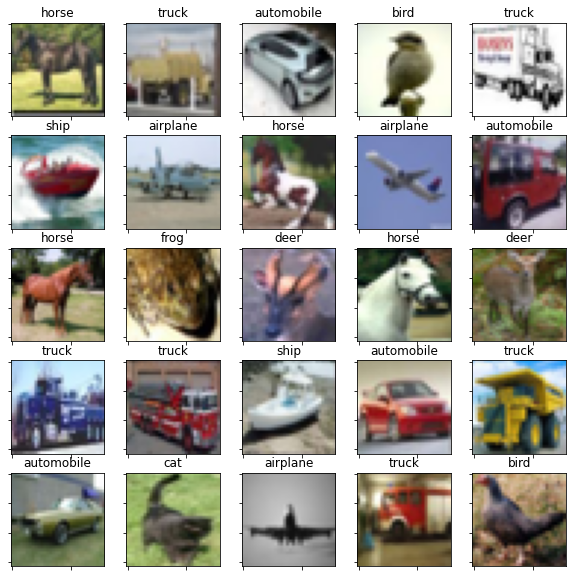

In [ ]:
show_random_images(cifar10_training, cifar10_training.classes)

In [ ]:
# con una forma bien pythonica, iteramos por todos los datos de entrenamiento
# de cifar10 y los apilamos en un tensor gigantezco
imgs = torch.stack([img_t for img_t, _ in cifar10_training], dim=3)
print(imgs.shape)

print(imgs.view(3, -1).size())

# calculamos la media de cada canal
mean = imgs.view(3, -1).mean(dim=1)
print(mean)

# y el desvío
std = imgs.view(3, -1).std(dim=1)
print(std)

torch.Size([3, 32, 32, 50000])
torch.Size([3, 51200000])
tensor([0.4914, 0.4822, 0.4465])
tensor([0.2470, 0.2435, 0.2616])


In [ ]:
IMG_SIZE = (32, 32)

In [ ]:
list_of_training_transformations = [transforms.Scale(IMG_SIZE),
                                    transforms.RandomRotation(degrees=[-30, 30], resample=Image.NEAREST),
                                    transforms.RandomHorizontalFlip(p=0.5),
                                    transforms.ColorJitter(brightness=(0.5, 1.5), contrast=(0.75, 1.25), saturation=(0.75, 1.25)),
                                    transforms.ToTensor()
                                    ]

list_of_test_transformations = [transforms.Scale(IMG_SIZE),
                                transforms.ToTensor()]

if not NORMALIZE:
  list_of_training_transformations.append(transforms.Normalize(mean=mean, std=std))
  list_of_test_transformations.append(transforms.Normalize(mean=mean, std=std))

# generamos las transformaciones que corresponden
training_transformations = transforms.Compose(list_of_training_transformations)
test_transformations = transforms.Compose(list_of_test_transformations)

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:280: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


In [ ]:
# descargamos los datos de entrenamiento (o los levantamos, si ya están ahí)
cifar10_training = datasets.CIFAR10(datasets_folder, train=True, download=True, transform=training_transformations)
# hacemos lo mismo con los de test (que los vamos a usar de datos de validación)
cifar10_validation = datasets.CIFAR10(datasets_folder, train=False, download=True, transform=test_transformations)

Files already downloaded and verified
Files already downloaded and verified


[]

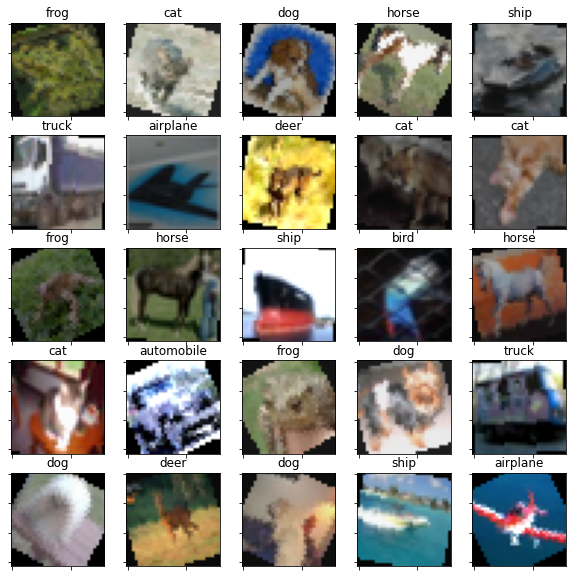

In [ ]:
show_random_images(cifar10_training, cifar10_training.classes, denorm=True, mean=mean, std=std)

In [ ]:
#Las clases estan balanceadas, por lo que no es necesario establecer pesos para
#balancear la carga de cada clase.
classes = pd.DataFrame({'target': cifar10_training.targets})
print(classes.value_counts())

target
9         5000
8         5000
7         5000
6         5000
5         5000
4         5000
3         5000
2         5000
1         5000
0         5000
dtype: int64


### 2. Implementación de su propia red neuronal convolucional

[Les damos la "cáscara" de la clase que queremos que implementen, con una arquitectura súper pava. La idea es que reemplacen esa arquitectura con su propia arquitectura de red neuronal convolucional, explicando las distintas decisiones que tuvieron en cuenta a la hora de decidir cuántas capas usar, qué profundidad, qué capas usar, etc.]

In [ ]:
import torch.nn as nn
from torchsummary import summary
import hiddenlayer as hl

In [ ]:
LEN_CLASSES = len(cifar10_training.classes)

In [ ]:
class OurCIFAR10Net(nn.Module):
  '''
  Clase que implementa una arquitectura de red neuronal para el problema de 
  clasificación de imágenes en 10 clases usando datos de CIFAR10
  '''

  def __init__(self, LEN_CLASSES):
    '''
    Constructor de la arquitectura
    '''
    super(OurCIFAR10Net, self).__init__()
  
    # ESTA ES LA ARQUITECTURA QUE TIENEN QUE MODIFICAR
    """
    you can use this formula [(W−K+2P)/S]+1.

    W is the input volume - in your case 128
    K is the Kernel size - in your case 5
    P is the padding - in your case 0 i believe
    S is the stride - which you have not provided.
    """
    self.model = nn.Sequential(
        nn.Conv2d(3, out_channels=32, kernel_size=3),
        nn.BatchNorm2d(32),
        nn.ReLU(),

        nn.Conv2d(32, out_channels=64, kernel_size=3),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=1),

        nn.Conv2d(64, out_channels=64, kernel_size=3),
        nn.BatchNorm2d(64),
        nn.ReLU(),

        nn.Conv2d(64, out_channels=128, kernel_size=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),

        nn.Conv2d(128, out_channels=128, kernel_size=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),

        nn.Flatten(start_dim=1),

        nn.Linear(15488, out_features=512),
        nn.BatchNorm1d(512),
        nn.ReLU(),

        nn.Dropout(0.25),

        nn.Linear(512, out_features=256),
        nn.BatchNorm1d(256),
        nn.ReLU(),

        nn.Linear(256, out_features=LEN_CLASSES)
    )
    # función de activación de la red
    self.final_activation = nn.Softmax(dim=1)


  def forward(self, inputs):
    '''
    Método que implementa el forward pass
    '''
    # SI HACEN LA ARQUITECTURA CAPA A CAPA, POR SEPARADO, REIMPLEMENTEN ESTE MÉTODO
    return self.model(inputs)


  def predict(self, inputs):
    '''
    Método que usaremos para predecir resultados
    '''
    # devolvemos el softmax de los resultados
    return self.final_activation(self.model(inputs))

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = OurCIFAR10Net(LEN_CLASSES).to(device)

summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
       BatchNorm2d-2           [-1, 32, 30, 30]              64
              ReLU-3           [-1, 32, 30, 30]               0
            Conv2d-4           [-1, 64, 28, 28]          18,496
       BatchNorm2d-5           [-1, 64, 28, 28]             128
              ReLU-6           [-1, 64, 28, 28]               0
         MaxPool2d-7           [-1, 64, 26, 26]               0
            Conv2d-8           [-1, 64, 24, 24]          36,928
       BatchNorm2d-9           [-1, 64, 24, 24]             128
             ReLU-10           [-1, 64, 24, 24]               0
           Conv2d-11          [-1, 128, 24, 24]           8,320
      BatchNorm2d-12          [-1, 128, 24, 24]             256
             ReLU-13          [-1, 128, 24, 24]               0
        MaxPool2d-14          [-1, 128,

/usr/local/lib/python3.6/dist-packages/torch/onnx/symbolic_helper.py:446: UserWarning: ONNX export mode is set to inference mode, but operator batch_norm is set to training  mode. The model will be exported in inference, as specified by the export mode.
  training_mode + ", as specified by the export mode.")
/usr/local/lib/python3.6/dist-packages/torch/onnx/symbolic_helper.py:446: UserWarning: ONNX export mode is set to inference mode, but operator dropout is set to training  mode. The model will be exported in inference, as specified by the export mode.
  training_mode + ", as specified by the export mode.")


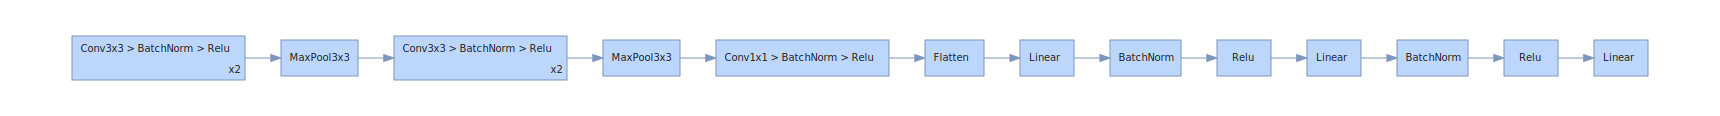

In [ ]:
hl_graph = hl.build_graph(model, torch.zeros([1024, 3, 32, 32]).to(device))
hl_graph.theme = hl.graph.THEMES["blue"].copy()  # Two options: basic and blue
hl_graph.save('rnn_hiddenlayer_good', format='png')
hl_graph

### 3. Entrenamiento y validación de la red

A continuación tienen que implementar el training loop, siguiendo las bases de lo que explicamos en clase. Queremos que el código sea capaz de:
* Entrenar el modelo.
* Registrar los valores de loss function en los datos de entrenamiento y validación.
* Reportar la performance promedio por época sobre los datos de validación, usando una métrica que uds elijan.
* Graficar las curvas de aprendizaje (la evolución de la loss function de entrenamiento y validación) y la métrica de evaluación, por cada época.

*No copien y peguen código a menos que lo entiendan perfectamente*. La idea es que lo programen uds mismxs, que aparezcan bugs, que tengan que resolverlos y que comprendan la dinámica del entrenamiento.

Pueden definir funciones propias que ayuden a reducir la cantidad de código repetido.

In [ ]:
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import confusion_matrix
import seaborn as sns
from datetime import datetime
from os import path

In [ ]:
def run_batches(model, loader, device, optimizer, loss_fn, lr_scheduler=None, train=True):
  """
  Run all batches in an epoch, updating the params if in train mode,
  otherwise calculate the total and the correct predictions.
  """

  # inicializamos una lista para ir guardando los valores de loss por batch
  per_batch_loss_values = np.zeros(len(loader))

  # Definimos las variables para medir las muestras totales y la cantidad de aciertos.
  #En caso de ser train mode no se utilizan las variables.
  total = 0
  correct = 0

  # iteramos por cada batch
  batch_i=0
  for imgs, labels in loader:
    # pasamos imágenes y labels al dispositivo donde estemos corriendo
    imgs = imgs.to(device)
    labels = labels.view(-1).to(device)

    # obtenemos la respuesta del modelo
    outputs = model(imgs)

    # calculamos la loss
    loss = loss_fn(outputs, labels)
    
    if train:
      # mandamos a 0 los gradientes
      optimizer.zero_grad()
      # hacemos un backward pass
      loss.backward()
      # y un paso del optimizador para actualizar los parámetros
      optimizer.step() 

    # registramos el valor de la loss
    per_batch_loss_values[batch_i] = float(loss.cpu())
    batch_i += 1

    if not train:
      # le aplicamos la activation function a las salidas para obtener scores
      probs = model.final_activation(outputs)

      # obtenemos la predicción de la clase
      _, predicted = torch.max(probs.cpu(), dim=1)
      labels = labels.cpu()
      total += labels.shape[0]
      correct += int((predicted == labels).sum())

  if train:
    return per_batch_loss_values
  else:
    return per_batch_loss_values, total, correct

In [ ]:
def run_epoch(model, loader, device, optimizer, loss_fn, lr_scheduler=None, train=True):
  """
  Configure the model and environment and run all batches in an epoch, 
  updating the params if in train mode, otherwise calculate the total 
  and the correct predictions.
  """

  # tenemos que poner el modelo en modo entrenamiento
  if train:
    model.train()
  else:
    model.eval()

  if train:
    per_batch_loss_values = \
                run_batches(model, loader, device, optimizer, loss_fn, train)
  else:
    with torch.no_grad():
      per_batch_loss_values, total, correct = \
                run_batches(model, loader, device, optimizer, loss_fn, lr_scheduler, train)

  if train:
    return per_batch_loss_values
  else:
    return per_batch_loss_values, total, correct

In [ ]:
"""
#Esto lo implementamos antes de saber que estaba el lr_scheduler.

def reduce_lr(loss_values, loss_dif=0.01, factor=0.1, look_back=5):
  global optimizer, lr

  if len(loss_values) > look_back: 
    losses_to_check = loss_values[-look_back:]

    modif_lr = True
    for i in range(1, len(losses_to_check)):
      if (losses_to_check[look_back-i] - losses_to_check[look_back-i-1] - loss_dif) < 0:
        modif_lr = False

    if modif_lr:
      lr = lr * factor
      optimizer = optim.Adam(model.parameters(), lr=lr)
      print("\nnew lr:", lr, "\n")"""

'\n#Esto lo implementamos antes de saber que estaba el lr_scheduler.\n\ndef reduce_lr(loss_values, loss_dif=0.01, factor=0.1, look_back=5):\n  global optimizer, lr\n\n  if len(loss_values) > look_back: \n    losses_to_check = loss_values[-look_back:]\n\n    modif_lr = True\n    for i in range(1, len(losses_to_check)):\n      if (losses_to_check[look_back-i] - losses_to_check[look_back-i-1] - loss_dif) < 0:\n        modif_lr = False\n\n    if modif_lr:\n      lr = lr * factor\n      optimizer = optim.Adam(model.parameters(), lr=lr)\n      print("\nnew lr:", lr, "\n")'

In [ ]:
def print_metrics(epoch, 
                  per_epoch_training_loss_values,
                  per_epoch_validation_loss_values,
                  per_epoch_validation_accuracy_values,
                  total_time):
  """
  Print the training and validation loss and the accuracy of the val dataset
  """
  global EPOCHS
  if (epoch % 1) == 0:
    print(f'Epoch: {format(epoch+1)} / {EPOCHS}')
    print(f'Time elapsed: {total_time}')
    print('- Training loss: {:.4f}'.format(per_epoch_training_loss_values[epoch]))
    print('- Validation loss: {:.4f}'.format(per_epoch_validation_loss_values[epoch]))
    print('- Validation accuracy: {:.4f}'.format(per_epoch_validation_accuracy_values[epoch]))

In [ ]:
BATCH_SIZE = 512
EPOCHS = 40
lr = 0.01

In [ ]:
# creamos un dataloader para los datos de training
training_loader = DataLoader(cifar10_training, batch_size=BATCH_SIZE, shuffle=True)

# creamos un dataloader para los datos de validation
validation_loader = DataLoader(cifar10_validation, batch_size=BATCH_SIZE, shuffle=False)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.01, patience=5, verbose=True)

In [ ]:
"""
Train the model and get the train and val scores
"""

if not GET_PRE_TRAINED:
  per_epoch_training_loss_values = []
  per_epoch_validation_loss_values = []
  per_epoch_validation_accuracy_values = []

  for epoch in range(EPOCHS):
    start = datetime.now()

    per_batch_training_loss_values = \
                run_epoch(model, training_loader, device, optimizer, loss_fn, train=True)
    per_batch_validation_loss_values, total, correct = \
                run_epoch(model, validation_loader, device, optimizer, loss_fn, lr_scheduler, train=False)


    # actualizamos las estadísticas y lr
    per_epoch_training_loss_values.append(np.mean(per_batch_training_loss_values))
    per_epoch_validation_loss_values.append(np.mean(per_batch_validation_loss_values))
    per_epoch_validation_accuracy_values.append(correct / total)
    
    #Deprecated, no sabiamos que existian los modulos en torch y lo intentamos
    #implementar a mano
    #reduce_lr(per_epoch_validation_loss_values)

    lr_scheduler.step(per_epoch_validation_loss_values[-1])

    end = datetime.now()

    print_metrics(epoch,
                  per_epoch_training_loss_values,
                  per_epoch_validation_loss_values,
                  per_epoch_validation_accuracy_values,
                  end-start)
else:
  print("Cargando modelo pre entrenado...")
  model = OurCIFAR10Net(LEN_CLASSES)

  model.load_state_dict(torch.load("/content/cifar10-model-DUIAI/grupo_04_cnn.pt"))
  model = model.to(device)
  summary(model, (3, 32, 32))

Epoch: 1 / 40
Time elapsed: 0:00:51.947079
- Training loss: 1.5861
- Validation loss: 1.2989
- Validation accuracy: 0.5389
Epoch: 2 / 40
Time elapsed: 0:00:51.499178
- Training loss: 1.2296
- Validation loss: 1.0955
- Validation accuracy: 0.6057
Epoch: 3 / 40
Time elapsed: 0:00:52.129828
- Training loss: 1.0660
- Validation loss: 0.9606
- Validation accuracy: 0.6621
Epoch: 4 / 40
Time elapsed: 0:00:52.283613
- Training loss: 0.9739
- Validation loss: 0.8983
- Validation accuracy: 0.6824
Epoch: 5 / 40
Time elapsed: 0:00:52.599031
- Training loss: 0.8955
- Validation loss: 0.8707
- Validation accuracy: 0.6951
Epoch: 6 / 40
Time elapsed: 0:00:52.632504
- Training loss: 0.8366
- Validation loss: 0.7565
- Validation accuracy: 0.7315
Epoch: 7 / 40
Time elapsed: 0:00:52.673674
- Training loss: 0.7811
- Validation loss: 0.8312
- Validation accuracy: 0.7143
Epoch: 8 / 40
Time elapsed: 0:00:52.239867
- Training loss: 0.7431
- Validation loss: 0.6851
- Validation accuracy: 0.7626
Epoch: 9 / 40
Ti

In [ ]:
model.eval()

OurCIFAR10Net(
  (model): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
    (15): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_

In [ ]:
if not GET_PRE_TRAINED:
  # guardamos los parámetros del modelo
  torch.save(model.state_dict(), path.join(datasets_folder, 'grupo_04_cnn.pt'))

"""
Hay que tener en cuenta que ademas de guardar el modelo deberiamos guardar al media y
el desvio calculado para los datos de entrenamiento, ya que estos datos se aplicaran
a todos los nuevos datos que ingresen a nuestro modelo. 
Esto no lo hacemos ya que no es un modelo que vayamos a deployar, sino que lo aplicamos 
simplemente para ahorrar tiempo de quien corrige.
"""

'\nHay que tener en cuenta que ademas de guardar el modelo deberiamos guardar al media y\nel desvio calculado para los datos de entrenamiento, ya que estos datos se aplicaran\na todos los nuevos datos que ingresen a nuestro modelo. \nEsto no lo hacemos ya que no es un modelo que vayamos a deployar, sino que lo aplicamos \nsimplemente para ahorrar tiempo de quien corrige.\n'

In [ ]:
rcParams['figure.figsize'] = 12, 4

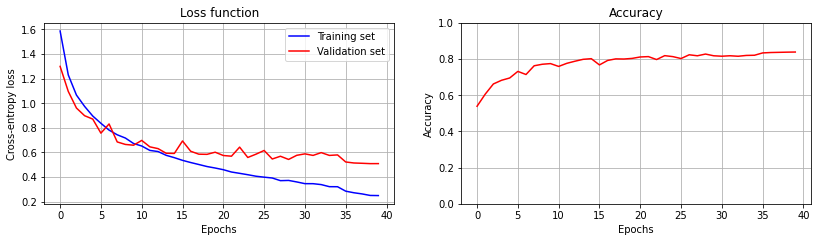

In [ ]:
if not GET_PRE_TRAINED:
  # creamos plots para la loss y el accuracy
  fig, axes = plt.subplots(1, 2)
  # graficamos la evolución de la loss de entrenamiento y la de validación
  axes[0].plot(per_epoch_training_loss_values, color='blue')
  axes[0].plot(per_epoch_validation_loss_values, color='red')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Cross-entropy loss')
  axes[0].grid(True)
  axes[0].legend(['Training set', 'Validation set'])
  axes[0].set_title('Loss function')
  # graficamos la evolución del accuracy
  axes[1].plot(per_epoch_validation_accuracy_values, color='red')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('Accuracy')
  axes[1].grid(True)
  axes[1].set_title('Accuracy')
  axes[1].set_ylim([0, 1.0])
  fig.tight_layout(pad=3.0)

In [ ]:
def display_predicted_images(images, predicted, labels, probs, correct=True):
  """
  Esta funcion imprime los resultados correctos o incorrectos del predictor
  segun se lo marque en el parametro "correct".
  """
  global cifar10_training, mean, std
  test_images_to_show = []
  test_labels_to_show = []
  test_probs_to_show = []
  try:
    comparission = enumerate(list(predicted == labels))
    for i, value in comparission:
      if bool(value) == correct:
        test_images_to_show.append(images[i].cpu())
        test_labels_to_show.append(predicted[i])
        test_probs_to_show.append(probs[i])
        
    list_result = show_random_images(test_images_to_show, 
                      cifar10_training.classes, 
                      labels=test_labels_to_show, 
                      probs=test_probs_to_show,
                      denorm=True, mean=mean, std=std)
    return list_result
  except ValueError:
    print(ValueError)

def display_result_map_probs(data, classes, row, column, denorm = True):  
  try:
    if (row >= matrix_image_rows or column >= matrix_image_columns):
      return
    pos = (row*matrix_image_rows + column)
    if pos > (len(data)):    
      return
    f, axarr = plt.subplots(1, 1, figsize=(2, 2))
    axarr.imshow(data[pos][0])
    prob = data[pos][1]
    mapping = dict(zip(classes, prob))
    mapping = sorted(mapping.items(), key=lambda x:x[1], reverse=True)
    for i in mapping:
      print(i[0], float(i[1]))
    print('==========================')
  except ValueError:
    print(ValueError)

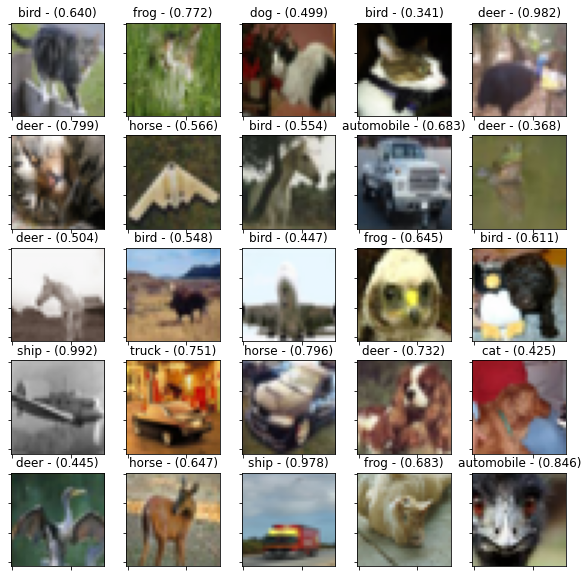

In [ ]:
imgs, labels = next(iter(validation_loader))
imgs = imgs.to(device)
labels = labels.view(-1).to(device)

probs = model.predict(imgs)
predicted = torch.argmax(probs.cpu(), dim=1)

showed_images = display_predicted_images(imgs.cpu(), predicted, labels.cpu(), probs=probs, correct=False)

automobile 0.6827398538589478
truck 0.3169897794723511
ship 0.00022365793120115995
cat 3.275643030065112e-05
airplane 1.3782432688458357e-05
dog 9.536746858884726e-08
horse 6.108053440812e-08
bird 3.462545805632544e-08
deer 2.1106885128574504e-09
frog 1.2860513765033943e-09


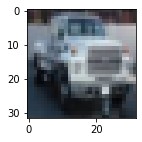

In [ ]:
display_result_map_probs(showed_images, cifar10_training.classes, 1, 3)

In [ ]:
#Obtenemos los valores de accuracy para cada clase por separado
total = list(cifar10_training.classes)
correct = list(cifar10_training.classes)

all_labels = []
all_predicted = []
for i in range(len(total)):
  total[i] = 0
  correct[i] = 0

for imgs, labels in validation_loader:
  imgs = imgs.to(device)
  labels = labels.view(-1).to(device)

  probs = model.predict(imgs)
  predicted = torch.argmax(probs.cpu(), dim=1)

  torch_labels = torch.tensor(labels)
  for i in range(len(cifar10_training.classes)):
    total[i] += int(sum(torch_labels == i))
    correct[i] += int(sum((predicted == i)[torch_labels == i]))

  all_labels.append(labels)
  all_predicted.append(predicted)
all_labels = [int(x) for y in all_labels for x in y]
all_predicted = [int(x) for y in all_predicted for x in y]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
rcParams['figure.figsize'] = 10, 7

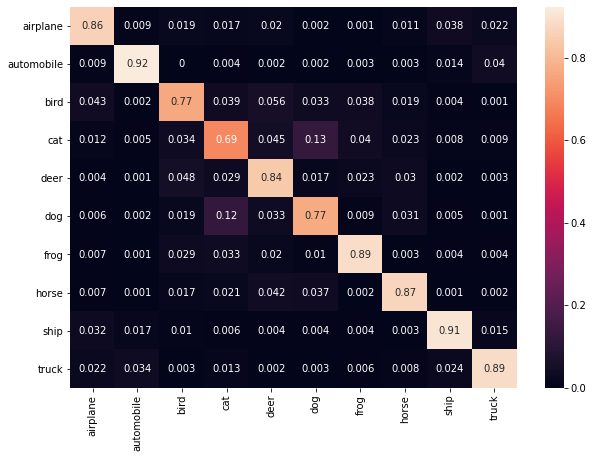

In [ ]:
cm = confusion_matrix(all_labels, all_predicted, normalize='true')
sns.heatmap(cm, annot=True, xticklabels=cifar10_training.classes, yticklabels=cifar10_training.classes)

In [ ]:
#Total accuracy
print("Accuracy:", sum(correct) / sum(total), "\n")

#Accuracy per class
print("###### Accuracy per class ######")

longer_class_len = len("automobile")
for i in range(len(cifar10_training.classes)):
  class_to_print = cifar10_training.classes[i] + ":"
  len_to_add = longer_class_len - len(cifar10_training.classes[i])
  for l in range(len_to_add):
    class_to_print += " "
  print(class_to_print, correct[i] / total[i])

Accuracy: 0.8405 

###### Accuracy per class ######
airplane:   0.861
automobile: 0.923
bird:       0.765
cat:        0.695
deer:       0.843
dog:        0.769
frog:       0.889
horse:      0.87
ship:       0.905
truck:      0.885


### 4. Evaluación sobre nuevos datos

A continuación les dejamos código que les permite abrir una serie de imágenes nuevas sobre las que podrían validar el algoritmo que implementaron.

Tienen que desarrollar las rutinas necesarias para:
* Convertir estas imágenes a tensores con los tamaños adecuados para poder procesarlos.
* Normalizarlos (utilizando las estadísticas que calculamos sobre los datos de entrenamiento).
* Iterar imagen por imagen y obtener su etiqueta utilizando la red neuronal convolucional entrenada.
* Calcular una o varias métricas de evaluación.
* Mostrar algunos ejemplos de resultados correctos o errados.

In [ ]:
import numpy as np
from os import path
import matplotlib.pyplot as plt

In [ ]:
# accedemos a los datos
images = np.load(path.join(new_datasets_folder, 'cifar10.1_v4_data.npy'))
labels = np.load(path.join(new_datasets_folder, 'cifar10.1_v4_labels.npy'))

# imprimimos los tamaños
print(images.shape)
print(labels.shape)

(2021, 32, 32, 3)
(2021,)


In [ ]:
#Confiamos ciegamente en que tengan el mismo orden de etiqueta
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
#Aplicamos las transformaciones y permutamos las dimensiones para que encajen
#con lo planteado para el model
test_images = torch.stack([test_transformations(Image.fromarray(img)) for img in images], dim=3)
test_images = test_images.permute(3,0,1,2) #Elems, Channels, h, w

print(test_images.shape)

torch.Size([2021, 3, 32, 32])


[]

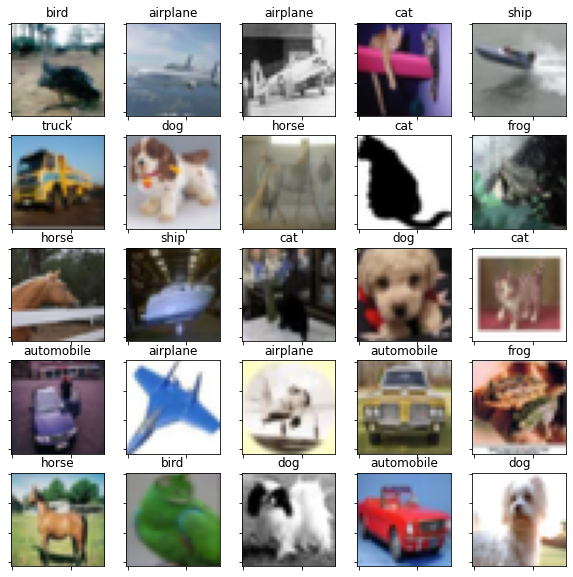

In [ ]:
show_random_images(test_images, cifar10_training.classes, labels=labels, denorm=True, mean=mean, std=std)

In [ ]:
#Calculamos la probabilidad de cada etiqueta para cada imagen
test_probs = []
predicted = []

with torch.no_grad():
  for img in test_images:
    img = img.to(device)
    img = torch.reshape(img, (-1, 3, 32, 32))
    prob = model.predict(img).cpu()
    test_probs.append(prob[0])
    #Calculamos la etiqueta predicha
    predicted.append(np.argmax(prob))

print(test_probs[0])
print(predicted[0])
print(len(predicted))

tensor([6.8175e-05, 1.2903e-03, 7.9283e-03, 9.3025e-02, 6.5088e-04, 5.3175e-02,
        7.9610e-01, 5.5539e-04, 1.8967e-05, 4.7189e-02])
tensor(6)
2021


In [ ]:
#Obtenemos los valores de accuracy para cada clase por separado
total = list(cifar10_training.classes)
correct = list(cifar10_training.classes)

torch_labels = torch.tensor(labels)
for i in range(len(cifar10_training.classes)):
  total[i] = int(sum(torch_labels == i))
  correct[i] = int(sum((torch.tensor(predicted) == i)[torch_labels == i]))

In [ ]:
rcParams['figure.figsize'] = 10, 7

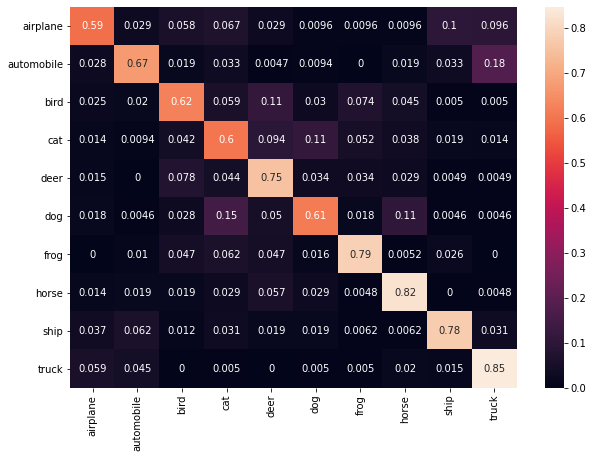

In [ ]:
cm = confusion_matrix(labels, predicted, normalize='true')
sns.heatmap(cm, annot=True, xticklabels=cifar10_training.classes, yticklabels=cifar10_training.classes)

In [ ]:
#Total accuracy
print("Accuracy:", sum(correct) / sum(total))

Accuracy: 0.706580900544285


In [ ]:
#Accuracy per class
print("Accuracy per class\n")

longer_class_len = len("automobile")
for i in range(len(cifar10_training.classes)):
  class_to_print = cifar10_training.classes[i] + ":"
  len_to_add = longer_class_len - len(cifar10_training.classes[i])
  for l in range(len_to_add):
    class_to_print += " "
  print(class_to_print, correct[i] / total[i])

Accuracy per class

airplane:   0.5913461538461539
automobile: 0.6745283018867925
bird:       0.6237623762376238
cat:        0.6037735849056604
deer:       0.7549019607843137
dog:        0.6146788990825688
frog:       0.7864583333333334
horse:      0.8238095238095238
ship:       0.7763975155279503
truck:      0.8465346534653465


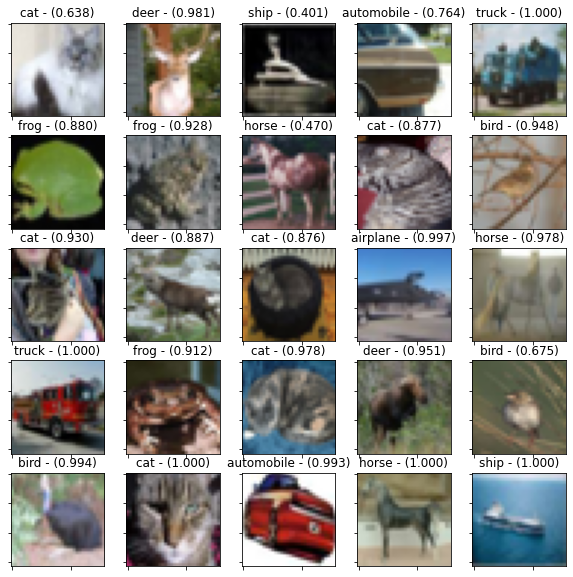

In [ ]:
#Imprimimos las imagenes que el predictor predijo correctamente.
showed_images = display_predicted_images(test_images, predicted, labels, probs=test_probs, correct=True)

cat 0.8767324090003967
frog 0.0696706548333168
ship 0.03111478127539158
bird 0.011688487604260445
deer 0.005638452246785164
horse 0.0025800068397074938
automobile 0.0013076179893687367
dog 0.0009538755984976888
truck 0.0002470444596838206
airplane 6.664352986263111e-05


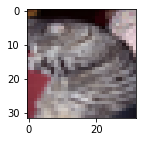

In [ ]:
display_result_map_probs(showed_images, cifar10_training.classes, 1, 3)

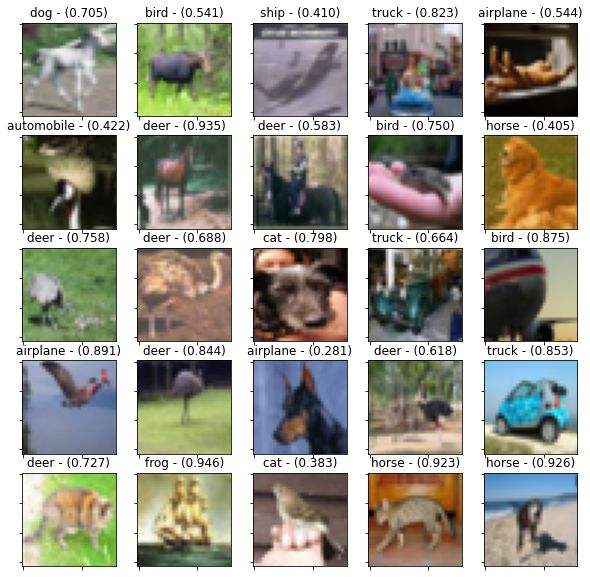

In [ ]:
#Imprimimos las imagenes que el predictor no predijo correctamente.
showed_images = display_predicted_images(test_images, predicted, labels, probs=test_probs, correct=False)

truck 0.8226065039634705
ship 0.10849063843488693
automobile 0.03466072306036949
airplane 0.019116288051009178
frog 0.009059654548764229
cat 0.002563615096732974
deer 0.002289850963279605
horse 0.0006486378842964768
bird 0.000515559280756861
dog 4.853021528106183e-05


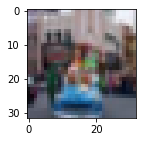

In [ ]:
display_result_map_probs(showed_images, cifar10_training.classes, 0, 3)